In [50]:
import pandas as pd

In [51]:
file_path = "/kaggle/input/hong-kong-stock-exchange-index/hsi.csv"

hsi = pd.read_csv(file_path)

In [52]:
file_path = "/kaggle/input/labelled-scmp/pred_scmp.csv"

scmp = pd.read_csv(file_path,engine ='python')

In [53]:
news = scmp[['published','summary','clean_summary','pred_summary']]

In [54]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   published      692 non-null    object
 1   summary        691 non-null    object
 2   clean_summary  687 non-null    object
 3   pred_summary   684 non-null    object
dtypes: object(4)
memory usage: 22.7+ KB


In [55]:
# Drop rows with null values in the 'title_prompt' column
news_cleaned = news.dropna(subset=['pred_summary'])

# Optionally, replace the original DataFrame with the cleaned version
news = news_cleaned


In [56]:
# Mapping function
def map_sentiment_to_score(sentiment):
    return {"negative": -1, "neutral": 0, "positive": 1}.get(sentiment, 0)

# Ensure the 'published' column is in datetime format
news['published'] = pd.to_datetime(news['published'])

# Apply the mapping function directly
news.loc[:, 'sentiment_score'] = news['pred_summary'].apply(map_sentiment_to_score)

# Convert 'published' to date only
news.loc[:, 'published_date'] = news['published'].dt.date

# Aggregate sentiment scores per date
aggregated_data = news.groupby('published_date')['sentiment_score'].sum().reset_index()

# Rename columns for clarity
aggregated_data.columns = ['Date', 'Net Sentiment Score']

In [57]:
hsi.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-09-04,18592.529297,18899.490234,18575.449219,18844.160156,18844.160156,4040296000
1,2023-09-05,18717.419922,18725.500000,18431.720703,18456.910156,18456.910156,2315663900
2,2023-09-06,18405.089844,18492.589844,18256.099609,18449.980469,18449.980469,2352887700
3,2023-09-07,18437.480469,18437.480469,18173.439453,18202.070312,18202.070312,2123306900
4,2023-09-11,17941.650391,18164.609375,17842.369141,18096.449219,18096.449219,2522422900


In [132]:
aggregated_data.head()

,Date,Net Sentiment Score
0,2023-09-07,-1
1,2023-09-19,-1
2,2023-09-22,0
3,2023-10-02,-1
4,2023-10-03,-1


In [133]:
# Convert 'Date' columns to datetime format if needed
aggregated_data['Date'] = pd.to_datetime(aggregated_data['Date'])
hsi['Date'] = pd.to_datetime(hsi['Date'])

# Perform a full outer merge
merged_data = aggregated_data.merge(hsi, on='Date', how='outer')

# Sort the merged data by date
merged_data = merged_data.sort_values(by='Date')

# Reset index for better readability
merged_data = merged_data.reset_index(drop=True)

In [134]:
merged_data.tail()

,Date,Net Sentiment Score,Open,High,Low,Close,Adj Close,Volume
178,2024-04-27,-21.0,NaN,NaN,NaN,NaN,NaN,NaN
179,2024-04-28,-37.0,NaN,NaN,NaN,NaN,NaN,NaN
180,2024-04-29,-42.0,17737.929688,18031.160156,17679.189453,17746.910156,17746.910156,4.850882e+09
181,2024-04-30,-58.0,NaN,NaN,NaN,NaN,NaN,NaN
182,2024-05-01,-21.0,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
merged_data['Net Sentiment Score'] = merged_data['Net Sentiment Score'].fillna(0)

In [136]:
merged_data = merged_data.dropna()

In [137]:
merged_data.drop(index=merged_data.index[-1:])

,Date,Net Sentiment Score,Open,High,Low,Close,Adj Close,Volume
0,2023-09-04,0.0,18592.529297,18899.490234,18575.449219,18844.160156,18844.160156,4.040296e+09
1,2023-09-05,0.0,18717.419922,18725.500000,18431.720703,18456.910156,18456.910156,2.315664e+09
2,2023-09-06,0.0,18405.089844,18492.589844,18256.099609,18449.980469,18449.980469,2.352888e+09
3,2023-09-07,-1.0,18437.480469,18437.480469,18173.439453,18202.070312,18202.070312,2.123307e+09
4,2023-09-11,0.0,17941.650391,18164.609375,17842.369141,18096.449219,18096.449219,2.522423e+09
...,...,...,...,...,...,...,...,...
173,2024-04-22,-22.0,16410.830078,16637.820312,16410.830078,16511.689453,16511.689453,2.915063e+09
174,2024-04-23,-26.0,16679.390625,16846.130859,16599.210938,16828.929688,16828.929688,2.993656e+09
175,2024-04-24,-24.0,16993.169922,17217.859375,16934.650391,17201.269531,17201.269531,3.314753e+09
176,2024-04-25,-25.0,17144.119141,17438.830078,17109.570312,17284.539062,17284.539062,3.147284e+09


# Time Series Visualization

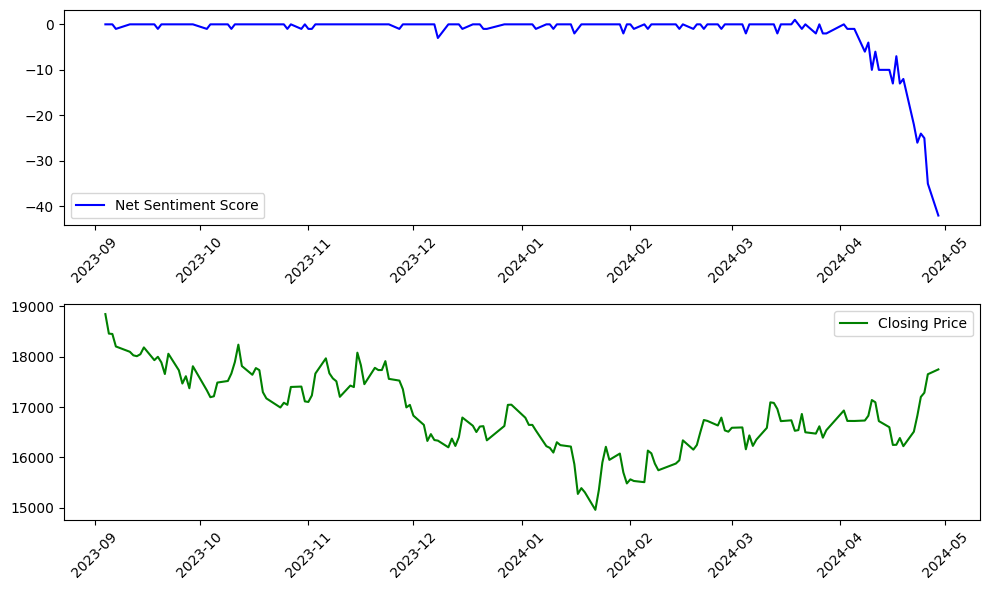

In [138]:
import matplotlib.pyplot as plt

# Plotting net sentiment scores and closing prices
plt.figure(figsize=(10, 6))

# Subplot for net sentiment scores
plt.subplot(2, 1, 1)
plt.plot(merged_data['Date'], merged_data['Net Sentiment Score'], label="Net Sentiment Score", color="blue")
plt.xticks(rotation=45)
plt.legend()

# Subplot for closing prices
plt.subplot(2, 1, 2)
plt.plot(merged_data['Date'], merged_data['Close'], label="Closing Price", color="green")
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

# Correlation

In [139]:
def compute_correlation(merged_data):
    # Select relevant columns
    selected_data = merged_data[['Net Sentiment Score', 'Close']]

    # Drop rows with missing values to avoid errors
    selected_data = selected_data.dropna()

    # Compute and print the correlation
    correlation = selected_data.corr()
    print(correlation)

In [140]:
compute_correlation(merged_data)

                     Net Sentiment Score     Close
Net Sentiment Score             1.000000 -0.041409
Close                          -0.041409  1.000000


# Lagged Correlations

In [141]:
def compute_lagged_correlations(merged_data, max_lag=10):
    # Ensure necessary columns are selected
    selected_data = merged_data[['Date', 'Net Sentiment Score', 'Close']].dropna()

    # Convert 'Date' to a time index for easier time-series analysis
    selected_data = selected_data.set_index('Date')

    # List to store correlations for different lags
    lagged_correlations = []

    for lag in range(max_lag + 1):
        # Shift sentiment scores by the current lag
        shifted_data = selected_data.copy()
        shifted_data['Net Sentiment Score'] = selected_data['Net Sentiment Score'].shift(lag)

        # Drop NaN values created by shifting
        shifted_data = shifted_data.dropna()

        # Compute the correlation between lagged sentiment and closing price
        correlation = shifted_data[['Net Sentiment Score', 'Close']].corr().iloc[0, 1]
        lagged_correlations.append({"Lag": lag, "Correlation": correlation})

    # Convert to a DataFrame for better visualization
    lagged_corr_df = pd.DataFrame(lagged_correlations)

    return lagged_corr_df

In [142]:
lagged_corr_df = compute_lagged_correlations(merged_data, max_lag=10)

In [143]:
lagged_corr_df

,Lag,Correlation
0,0,-0.041409
1,1,-0.040463
2,2,-0.041281
3,3,-0.044058
4,4,-0.040998
5,5,-0.035855
6,6,-0.038316
7,7,-0.044137
8,8,-0.051280
9,9,-0.078209


# Statistical Significance

In [144]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, permutation_test

def test_correlation_significance(merged_data, max_lag=10):
    # Ensure necessary columns are selected
    selected_data = merged_data[['Date', 'Net Sentiment Score', 'Close']].dropna()

    # Convert 'Date' to a time index
    selected_data = selected_data.set_index('Date')

    # List to store lagged correlations and p-values
    lagged_results = []

    for lag in range(max_lag + 1):
        # Shift sentiment scores by the current lag
        shifted_data = selected_data.copy()
        shifted_data['Net Sentiment Score'] = selected_data['Net Sentiment Score'].shift(lag)

        # Drop NaN values created by shifting
        shifted_data = shifted_data.dropna()

        # Compute Pearson correlation and p-value
        corr, p_value = pearsonr(shifted_data['Net Sentiment Score'], shifted_data['Close'])

        lagged_results.append({"Lag": lag, "Correlation": corr, "P-value": p_value})

    # Convert to a DataFrame
    lagged_results_df = pd.DataFrame(lagged_results)

    return lagged_results_df

In [145]:
lagged_results_df = test_correlation_significance(merged_data, max_lag=10)

In [146]:
print(lagged_results_df)

    Lag  Correlation   P-value
0     0    -0.041409  0.603130
1     1    -0.040463  0.612572
2     2    -0.041281  0.606556
3     3    -0.044058  0.583763
4     4    -0.040998  0.611337
5     5    -0.035855  0.657825
6     6    -0.038316  0.637081
7     7    -0.044137  0.588004
8     8    -0.051280  0.530387
9     9    -0.078209  0.339818
10   10    -0.088222  0.283022


# Regression Analysis

In [147]:
import statsmodels.api as sm

def regression_analysis(merged_data, lag=1):
    # Ensure necessary columns are selected
    selected_data = merged_data[['Date', 'Net Sentiment Score', 'Close']].dropna()

    # Convert 'Date' to a time index
    selected_data = selected_data.set_index('Date')

    # Shift sentiment scores by the specified lag
    selected_data['Net Sentiment Score'] = selected_data['Net Sentiment Score'].shift(lag)

    # Drop NaN values
    selected_data = selected_data.dropna()

    # Independent and dependent variables
    X = selected_data[['Net Sentiment Score']]
    y = selected_data['Close']

    # Add a constant for regression analysis
    X = sm.add_constant(X)

    # Build the regression model
    model = sm.OLS(y, X).fit()

    print(model.summary())


In [148]:
regression_analysis(merged_data, lag=10)

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.161
Date:                Thu, 02 May 2024   Prob (F-statistic):              0.283
Time:                        04:14:06   Log-Likelihood:                -1192.6
No. Observations:                 150   AIC:                             2389.
Df Residuals:                     148   BIC:                             2395.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.677e+04    

# Train Test

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
import statsmodels.api as sm


In [150]:
# Assuming `merged_data` is the DataFrame containing the necessary data
def split_data(merged_data):
    # Ensure the data is sorted by date
    merged_data = merged_data.sort_values(by="Date")

    # Determine the split index
    total_dates = len(merged_data)
    train_size = int(total_dates * (2 / 3))

    # Split into training and testing sets
    train_data = merged_data.iloc[:train_size]
    test_data = merged_data.iloc[train_size:]

    return train_data, test_data

def build_forecasting_model(train_data, test_data):
    # Prepare independent (X) and dependent (y) variables
    X_train = sm.add_constant(train_data['Net Sentiment Score'])
    y_train = train_data['Close']

    X_test = sm.add_constant(test_data['Net Sentiment Score'])
    y_test = test_data['Close']

    # Build the regression model
    model = sm.OLS(y_train, X_train).fit()

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate model performance
    print(model.summary())

    # Visualize the results
    plt.figure(figsize=(12, 6))

    # Plot actual closing prices
    plt.plot(test_data['Date'], y_test, label="Actual Closing Price", color="green")

    # Plot predicted closing prices
    plt.plot(test_data['Date'], y_pred, label="Predicted Closing Price", color="red")

    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [151]:
train_data, test_data = split_data(merged_data)

In [152]:
train_data.head()

,Date,Net Sentiment Score,Open,High,Low,Close,Adj Close,Volume
0,2023-09-04,0.0,18592.529297,18899.490234,18575.449219,18844.160156,18844.160156,4.040296e+09
1,2023-09-05,0.0,18717.419922,18725.500000,18431.720703,18456.910156,18456.910156,2.315664e+09
2,2023-09-06,0.0,18405.089844,18492.589844,18256.099609,18449.980469,18449.980469,2.352888e+09
3,2023-09-07,-1.0,18437.480469,18437.480469,18173.439453,18202.070312,18202.070312,2.123307e+09
4,2023-09-11,0.0,17941.650391,18164.609375,17842.369141,18096.449219,18096.449219,2.522423e+09


                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     4.732
Date:                Thu, 02 May 2024   Prob (F-statistic):             0.0319
Time:                        04:14:09   Log-Likelihood:                -862.60
No. Observations:                 106   AIC:                             1729.
Df Residuals:                     104   BIC:                             1735.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.711e+04    

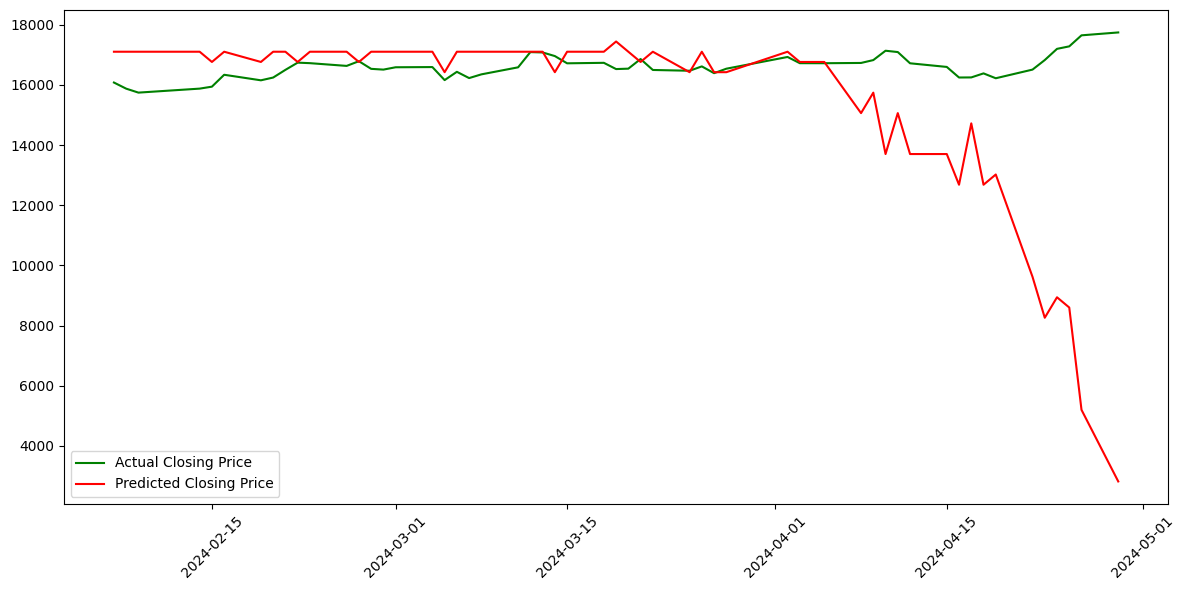

In [153]:
build_forecasting_model(train_data, test_data)

## Adding additional lagged values

In [154]:
merged_data.head()

,Date,Net Sentiment Score,Open,High,Low,Close,Adj Close,Volume
0,2023-09-04,0.0,18592.529297,18899.490234,18575.449219,18844.160156,18844.160156,4.040296e+09
1,2023-09-05,0.0,18717.419922,18725.500000,18431.720703,18456.910156,18456.910156,2.315664e+09
2,2023-09-06,0.0,18405.089844,18492.589844,18256.099609,18449.980469,18449.980469,2.352888e+09
3,2023-09-07,-1.0,18437.480469,18437.480469,18173.439453,18202.070312,18202.070312,2.123307e+09
4,2023-09-11,0.0,17941.650391,18164.609375,17842.369141,18096.449219,18096.449219,2.522423e+09


In [155]:
def add_features(merged_data, max_lag=10, window_size=7):
    # Ensure necessary columns are selected
    selected_data = merged_data[['Date', 'Net Sentiment Score', 'Close']].dropna()

    # Convert 'Date' to a time index
    selected_data = selected_data.set_index('Date')

    # Lagged values for sentiment scores and close prices differences
    for lag in range(1, max_lag + 1):
        selected_data[f'Net Sentiment Score Diff Lag {lag}'] = selected_data['Net Sentiment Score'].diff(lag)
        selected_data[f'Close Price Diff Lag {lag}'] = selected_data['Close'].diff(lag)

    # Moving averages for closing prices
    selected_data[f'Close MA {window_size}'] = selected_data['Close'].rolling(window_size).mean()

    # Volatility metric (rolling standard deviation)
    selected_data[f'Close Volatility {window_size}'] = selected_data['Close'].rolling(window_size).std()

    # Drop NaN values created by shifting or rolling
    selected_data = selected_data.dropna()

    return selected_data

In [156]:
merged_data = add_features(merged_data, max_lag=10, window_size=7)

In [162]:
merged_data.tail()

,Net Sentiment Score,Close,Net Sentiment Score Diff Lag 1,Close Price Diff Lag 1,Net Sentiment Score Diff Lag 2,Close Price Diff Lag 2,Net Sentiment Score Diff Lag 3,Close Price Diff Lag 3,Net Sentiment Score Diff Lag 4,Close Price Diff Lag 4,...,Net Sentiment Score Diff Lag 7,Close Price Diff Lag 7,Net Sentiment Score Diff Lag 8,Close Price Diff Lag 8,Net Sentiment Score Diff Lag 9,Close Price Diff Lag 9,Net Sentiment Score Diff Lag 10,Close Price Diff Lag 10,Close MA 7,Close Volatility 7
Date,,,,,,,,,,,,,,,,,,,,,
2024-04-23,-26.0,16828.929688,-4.0,317.240234,-14.0,604.790039,-13.0,443.060547,-19.0,577.089844,...,-16.0,107.240234,-20.0,-266.099609,-16.0,-310.240234,-22.0,0.859375,16435.985491,224.893763
2024-04-24,-24.0,17201.269531,2.0,372.339844,-2.0,689.580078,-12.0,977.129883,-11.0,815.400391,...,-14.0,600.808594,-14.0,479.580078,-18.0,106.240234,-14.0,62.099609,16521.815290,367.537626
2024-04-25,-25.0,17284.539062,-1.0,83.269531,1.0,455.609375,-3.0,772.849609,-13.0,1060.399414,...,-12.0,1035.569336,-15.0,684.078125,-15.0,562.849609,-19.0,189.509766,16669.753767,440.568901
2024-04-26,-35.0,17651.150391,-10.0,366.611328,-11.0,449.880859,-9.0,822.220703,-13.0,1139.460938,...,-28.0,1399.310547,-22.0,1402.180664,-25.0,1050.689453,-25.0,929.460938,16869.655273,528.104904
2024-04-29,-42.0,17746.910156,-7.0,95.759766,-17.0,462.371094,-18.0,545.640625,-16.0,917.980469,...,-29.0,1361.041016,-35.0,1495.070312,-29.0,1497.940430,-32.0,1146.449219,17064.089704,569.248424


In [158]:
train_data, test_data = split_data(merged_data)

In [159]:
train_data.columns

Index(['Net Sentiment Score', 'Close', 'Net Sentiment Score Diff Lag 1',
       'Close Price Diff Lag 1', 'Net Sentiment Score Diff Lag 2',
       'Close Price Diff Lag 2', 'Net Sentiment Score Diff Lag 3',
       'Close Price Diff Lag 3', 'Net Sentiment Score Diff Lag 4',
       'Close Price Diff Lag 4', 'Net Sentiment Score Diff Lag 5',
       'Close Price Diff Lag 5', 'Net Sentiment Score Diff Lag 6',
       'Close Price Diff Lag 6', 'Net Sentiment Score Diff Lag 7',
       'Close Price Diff Lag 7', 'Net Sentiment Score Diff Lag 8',
       'Close Price Diff Lag 8', 'Net Sentiment Score Diff Lag 9',
       'Close Price Diff Lag 9', 'Net Sentiment Score Diff Lag 10',
       'Close Price Diff Lag 10', 'Close MA 7', 'Close Volatility 7'],
      dtype='object')

In [160]:
def build_forecasting_model(train_data, test_data):
    # Prepare independent (X) and dependent (y) variables
    X_train = train_data[[
    'Net Sentiment Score',  'Net Sentiment Score Diff Lag 1',
       'Close Price Diff Lag 1', 'Net Sentiment Score Diff Lag 2',
       'Close Price Diff Lag 2', 'Net Sentiment Score Diff Lag 3',
       'Close Price Diff Lag 3', 'Net Sentiment Score Diff Lag 4',
       'Close Price Diff Lag 4', 'Net Sentiment Score Diff Lag 5',
       'Close Price Diff Lag 5', 'Net Sentiment Score Diff Lag 6',
       'Close Price Diff Lag 6', 'Net Sentiment Score Diff Lag 7',
       'Close Price Diff Lag 7', 'Net Sentiment Score Diff Lag 8',
       'Close Price Diff Lag 8', 'Net Sentiment Score Diff Lag 9',
       'Close Price Diff Lag 9', 'Net Sentiment Score Diff Lag 10',
       'Close Price Diff Lag 10', 'Close MA 7', 'Close Volatility 7'
    ]]

    X_train = sm.add_constant(X_train)
    y_train = train_data['Close']

    X_test = test_data[[
    'Net Sentiment Score',  'Net Sentiment Score Diff Lag 1',
       'Close Price Diff Lag 1', 'Net Sentiment Score Diff Lag 2',
       'Close Price Diff Lag 2', 'Net Sentiment Score Diff Lag 3',
       'Close Price Diff Lag 3', 'Net Sentiment Score Diff Lag 4',
       'Close Price Diff Lag 4', 'Net Sentiment Score Diff Lag 5',
       'Close Price Diff Lag 5', 'Net Sentiment Score Diff Lag 6',
       'Close Price Diff Lag 6', 'Net Sentiment Score Diff Lag 7',
       'Close Price Diff Lag 7', 'Net Sentiment Score Diff Lag 8',
       'Close Price Diff Lag 8', 'Net Sentiment Score Diff Lag 9',
       'Close Price Diff Lag 9', 'Net Sentiment Score Diff Lag 10',
       'Close Price Diff Lag 10', 'Close MA 7', 'Close Volatility 7'
    ]]

    X_test = sm.add_constant(X_test)
    y_test = test_data['Close']

    # Build the regression model
    model = sm.OLS(y_train, X_train).fit()

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate model performance
    print(model.summary())

    # Visualization
    plt.figure(figsize=(12, 6))

    # Plot actual vs. predicted closing prices
    plt.plot(test_data.index, y_test, label="Actual Closing Price", color="green")
    plt.plot(test_data.index, y_pred, label="Predicted Closing Price", color="red")

    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.296e+27
Date:                Thu, 02 May 2024   Prob (F-statistic):               0.00
Time:                        04:14:52   Log-Likelihood:                 2322.2
No. Observations:                 100   AIC:                            -4596.
Df Residuals:                      76   BIC:                            -4534.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

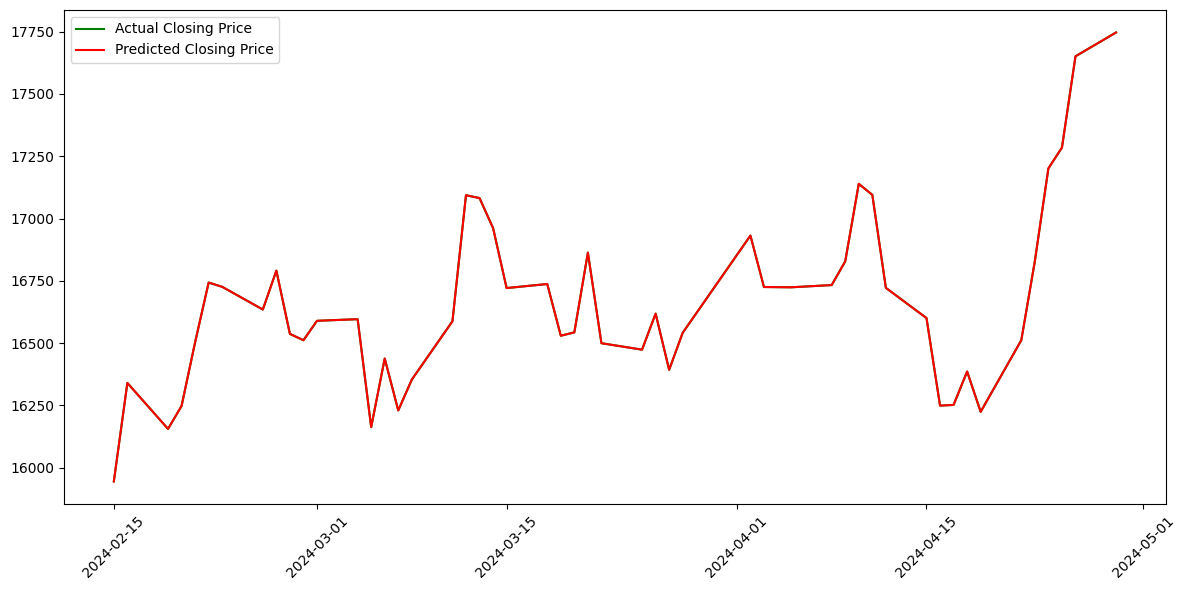

In [161]:
build_forecasting_model(train_data, test_data)

# XGBoost

In [163]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import xgboost as xgb

def build_and_save_xgboost_model(train_data, test_data, model_filename="hsi_xgboost_model.bin"):
    # Define the features to be used
    features = [
    'Net Sentiment Score',  'Net Sentiment Score Diff Lag 1',
       'Close Price Diff Lag 1', 'Net Sentiment Score Diff Lag 2',
       'Close Price Diff Lag 2', 'Net Sentiment Score Diff Lag 3',
       'Close Price Diff Lag 3', 'Net Sentiment Score Diff Lag 4',
       'Close Price Diff Lag 4', 'Net Sentiment Score Diff Lag 5',
       'Close Price Diff Lag 5', 'Net Sentiment Score Diff Lag 6',
       'Close Price Diff Lag 6', 'Net Sentiment Score Diff Lag 7',
       'Close Price Diff Lag 7', 'Net Sentiment Score Diff Lag 8',
       'Close Price Diff Lag 8', 'Net Sentiment Score Diff Lag 9',
       'Close Price Diff Lag 9', 'Net Sentiment Score Diff Lag 10',
       'Close Price Diff Lag 10', 'Close MA 7', 'Close Volatility 7'
    ]

    # Prepare the training and testing datasets
    X_train = train_data[features]
    y_train = train_data['Close']

    X_test = test_data[features]
    y_test = test_data['Close']

    # Convert to DMatrix for XGBoost
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)

    # Define XGBoost parameters
    params = {
        'objective': 'reg:squarederror',
        'max_depth': 5,
        'eta': 0.1,
        'subsample': 0.8,
        'colsample_bytree': 0.8
    }

    # Train the model
    model = xgb.train(params, dtrain, 100)

    # Save the model in binary format
    model.save_model(model_filename)

    # Make predictions on the test dataset
    y_pred = model.predict(dtest)

    # Evaluate the model
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"RMSE: {rmse}, R-squared: {r2}")

    # Visualization
    plt.figure(figsize=(12, 6))
    plt.plot(test_data.index, y_test, label="Actual Closing Price", color="green")
    plt.plot(test_data.index, y_pred, label="Predicted Closing Price", color="red")
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [165]:
train_data

,Net Sentiment Score,Close,Net Sentiment Score Diff Lag 1,Close Price Diff Lag 1,Net Sentiment Score Diff Lag 2,Close Price Diff Lag 2,Net Sentiment Score Diff Lag 3,Close Price Diff Lag 3,Net Sentiment Score Diff Lag 4,Close Price Diff Lag 4,...,Net Sentiment Score Diff Lag 7,Close Price Diff Lag 7,Net Sentiment Score Diff Lag 8,Close Price Diff Lag 8,Net Sentiment Score Diff Lag 9,Close Price Diff Lag 9,Net Sentiment Score Diff Lag 10,Close Price Diff Lag 10,Close MA 7,Close Volatility 7
Date,,,,,,,,,,,,,,,,,,,,,
2023-09-19,-1.0,17997.169922,-1.0,66.619141,-1.0,-185.720703,-1.0,-50.750000,-1.0,-12.050781,...,0.0,-204.900391,-1.0,-452.810547,-1.0,-459.740234,-1.0,-846.990234,18041.441685,80.220953
2023-09-20,0.0,17885.599609,1.0,-111.570312,0.0,-44.951172,0.0,-297.291016,0.0,-162.320312,...,0.0,-210.849609,1.0,-316.470703,0.0,-564.380859,0.0,-571.310547,18011.320312,94.447738
2023-09-21,0.0,17655.410156,0.0,-230.189453,1.0,-341.759766,0.0,-275.140625,0.0,-527.480469,...,0.0,-370.480469,0.0,-441.039062,1.0,-546.660156,0.0,-794.570312,17958.394531,163.490076
2023-09-22,0.0,18057.449219,0.0,402.039062,0.0,171.849609,1.0,60.279297,0.0,126.898438,...,0.0,48.228516,0.0,31.558594,0.0,-39.000000,1.0,-144.621094,17965.284319,166.968199
2023-09-25,0.0,17729.289062,0.0,-328.160156,0.0,73.878906,0.0,-156.310547,1.0,-267.880859,...,0.0,-318.630859,0.0,-279.931641,0.0,-296.601562,0.0,-367.160156,17919.765625,183.317454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-06,-1.0,16136.870117,-1.0,626.860352,0.0,603.310547,-1.0,570.660156,-1.0,651.799805,...,-1.0,184.639648,-1.0,-75.089844,-1.0,237.000000,-1.0,782.889648,15716.058594,276.666375
2024-02-07,0.0,16081.889648,1.0,-54.980469,0.0,571.879883,1.0,548.330078,0.0,515.679688,...,0.0,4.649414,0.0,129.659180,0.0,-130.070312,0.0,182.019531,15716.722796,277.681711
2024-02-08,0.0,15878.070312,0.0,-203.819336,1.0,-258.799805,0.0,368.060547,1.0,344.510742,...,2.0,174.620117,0.0,-199.169922,0.0,-74.160156,0.0,-333.889648,15741.668527,284.060917


In [167]:
test_data.drop(index=test_data.index[-1:])

,Net Sentiment Score,Close,Net Sentiment Score Diff Lag 1,Close Price Diff Lag 1,Net Sentiment Score Diff Lag 2,Close Price Diff Lag 2,Net Sentiment Score Diff Lag 3,Close Price Diff Lag 3,Net Sentiment Score Diff Lag 4,Close Price Diff Lag 4,...,Net Sentiment Score Diff Lag 7,Close Price Diff Lag 7,Net Sentiment Score Diff Lag 8,Close Price Diff Lag 8,Net Sentiment Score Diff Lag 9,Close Price Diff Lag 9,Net Sentiment Score Diff Lag 10,Close Price Diff Lag 10,Close MA 7,Close Volatility 7
Date,,,,,,,,,,,,,,,,,,,,,
2024-02-15,-1.0,15944.629883,-1.0,65.250000,-1.0,198.049805,-1.0,66.559570,-1.0,-137.259766,...,0.0,411.070312,-1.0,378.419922,-1.0,459.559570,1.0,241.179688,15882.489955,210.385783
2024-02-16,0.0,16339.959961,1.0,395.330078,0.0,460.580078,0.0,593.379883,0.0,461.889648,...,0.0,829.950195,1.0,806.400391,0.0,773.750000,0.0,854.889648,16001.054269,199.042670
2024-02-19,-1.0,16155.610352,-1.0,-184.349609,0.0,210.980469,-1.0,276.230469,-1.0,409.030273,...,0.0,18.740234,-1.0,645.600586,0.0,622.050781,-1.0,589.400391,16003.731445,201.287263
2024-02-20,0.0,16247.509766,1.0,91.899414,0.0,-92.450195,1.0,302.879883,0.0,368.129883,...,0.0,165.620117,1.0,110.639648,0.0,737.500000,1.0,713.950195,16027.391462,220.794008
2024-02-21,0.0,16503.099609,0.0,255.589844,1.0,347.489258,0.0,163.139648,1.0,558.469727,...,0.0,625.029297,0.0,421.209961,1.0,366.229492,0.0,993.089844,16116.681362,271.014328
2024-02-22,-1.0,16742.949219,-1.0,239.849609,-1.0,495.439453,0.0,587.338867,-1.0,402.989258,...,-1.0,996.369141,-1.0,864.878906,-1.0,661.059570,0.0,606.079102,16259.019810,303.893465
2024-02-23,0.0,16725.859375,1.0,-17.089844,0.0,222.759766,0.0,478.349609,1.0,570.249023,...,0.0,846.479492,0.0,979.279297,0.0,847.789062,0.0,643.969727,16379.945452,295.961443
2024-02-26,0.0,16634.740234,0.0,-91.119141,1.0,-108.208984,0.0,131.640625,0.0,387.230469,...,1.0,690.110352,0.0,755.360352,0.0,888.160156,0.0,756.669922,16478.532645,235.564482
2024-02-27,-1.0,16790.800781,-1.0,156.060547,-1.0,64.941406,0.0,47.851562,-1.0,287.701172,...,-1.0,450.840820,0.0,846.170898,-1.0,911.420898,-1.0,1044.220703,16542.938477,252.393863


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [04:18:13] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


RMSE: 202.6953626239602, R-squared: 0.6812980442190609


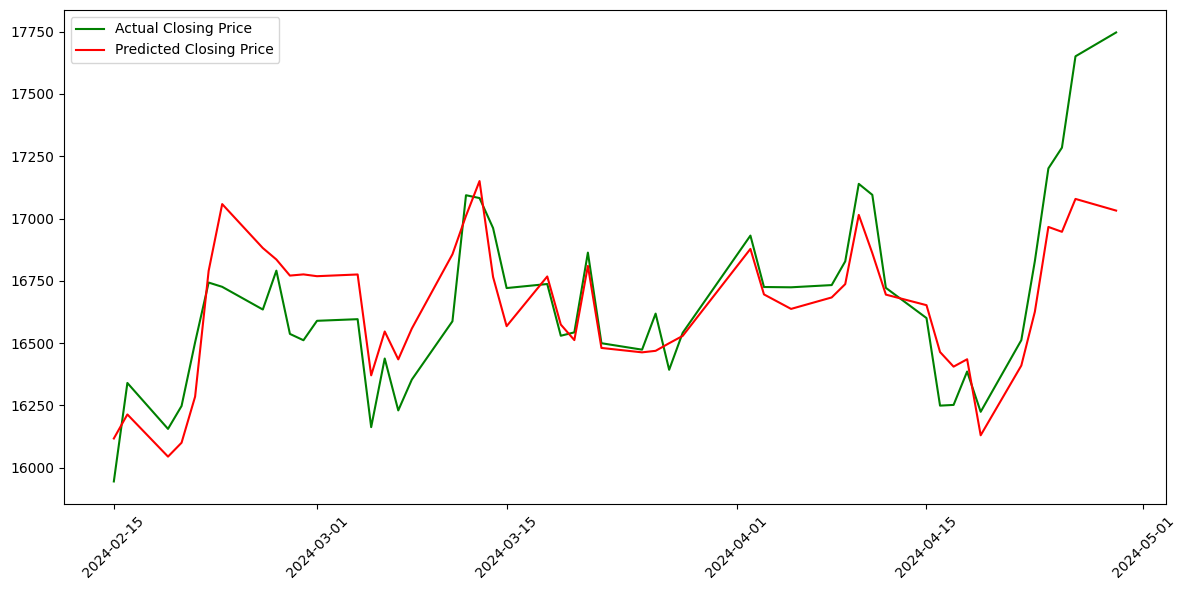

In [168]:
build_and_save_xgboost_model(train_data, test_data)

In [172]:
features = [
    'Net Sentiment Score',  'Net Sentiment Score Diff Lag 1',
       'Close Price Diff Lag 1', 'Net Sentiment Score Diff Lag 2',
       'Close Price Diff Lag 2', 'Net Sentiment Score Diff Lag 3',
       'Close Price Diff Lag 3', 'Net Sentiment Score Diff Lag 4',
       'Close Price Diff Lag 4', 'Net Sentiment Score Diff Lag 5',
       'Close Price Diff Lag 5', 'Net Sentiment Score Diff Lag 6',
       'Close Price Diff Lag 6', 'Net Sentiment Score Diff Lag 7',
       'Close Price Diff Lag 7', 'Net Sentiment Score Diff Lag 8',
       'Close Price Diff Lag 8', 'Net Sentiment Score Diff Lag 9',
       'Close Price Diff Lag 9', 'Net Sentiment Score Diff Lag 10',
       'Close Price Diff Lag 10', 'Close MA 7', 'Close Volatility 7'
    ]

In [173]:
def load_xgboost_model(filename):
    # Create an empty XGBoost model
    model = xgb.Booster()

    # Load the model from the specified file
    model.load_model(filename)

    return model

In [174]:
import xgboost as xgb

# Prepare the training and testing datasets
X_train = train_data[features]
y_train = train_data['Close']

X_test = test_data[features]
y_test = test_data['Close']

# Convert to DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)


In [175]:
model = load_xgboost_model("hsi_xgboost_model.bin")
y_pred = model.predict(dtest)

# Evaluate and visualize predictions as needed
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}, R-squared: {r2}")

RMSE: 202.6953626239602, R-squared: 0.6812980442190609


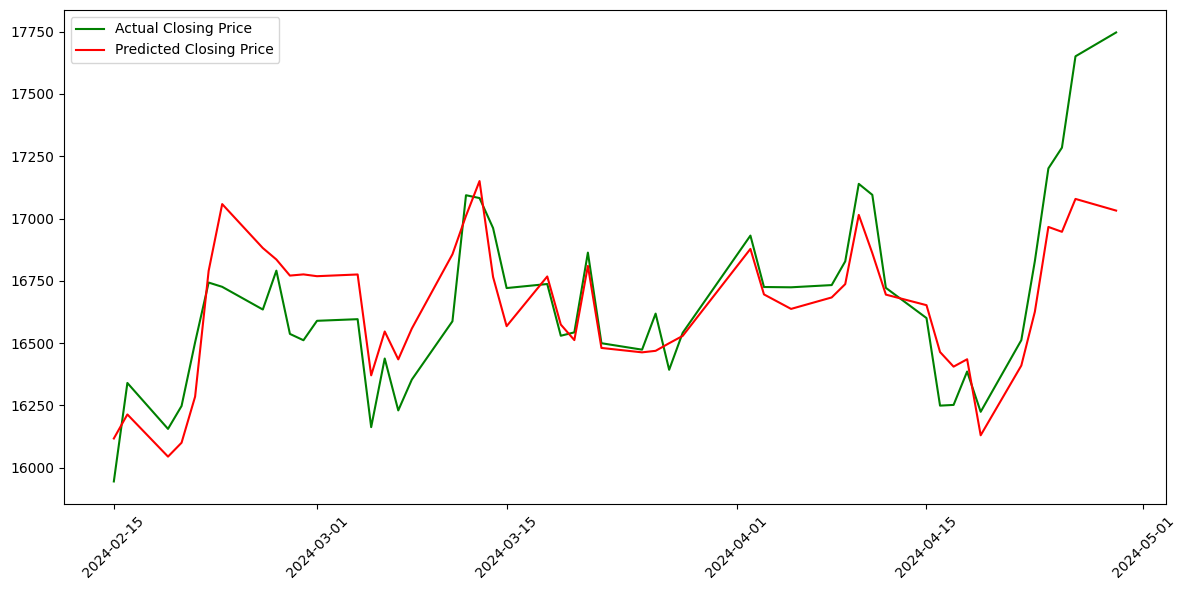

In [176]:
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, y_test, label="Actual Closing Price", color="green")
plt.plot(test_data.index, y_pred, label="Predicted Closing Price", color="red")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [177]:
train_data.to_csv('train_data.csv')
test_data.to_csv('test_data.csv')

In [ ]:
import joblib

# Assuming `xgboost_model` is the model object after training
joblib.dump(model, "hsi_xgboost_model1.bin")